<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session%207%20-%20In-Depth%20Coding%20Practice/Drill6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [103]:
# To reload the disk files
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                        transforms.RandomRotation((-7.0, 7.0), fill=(0,)),

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [105]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [106]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


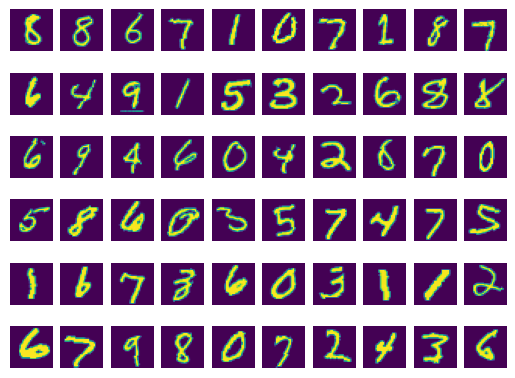

In [107]:
from utils import plot_images
dataiter = iter(train_loader)
images, labels = next(dataiter)
plot_images(60, images)

# Model Params


In [111]:
from models.model6 import Model6
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model6().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
         Dropout2d-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
         Dropout2d-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 22, 22]           1,080
             ReLU-10           [-1, 12, 22, 22]               0
      BatchNorm2d-11           [-1, 12, 22, 22]              24
        Dropout2d-12           [-1, 12, 22, 22]               0

# Model Training and Testing

In [113]:
from torch.optim.lr_scheduler import StepLR
from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model6().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    train_test_instance.test(model, device, test_loader)

EPOCH: 1


Loss=0.1260455995798111 Batch_id=468 Accuracy=87.41: 100%|██████████| 469/469 [00:22<00:00, 21.16it/s]



Test set: Average loss: 0.0741, Accuracy: 9810/10000 (98.10%)

EPOCH: 2


Loss=0.04595902934670448 Batch_id=468 Accuracy=97.43: 100%|██████████| 469/469 [00:23<00:00, 19.56it/s]



Test set: Average loss: 0.0503, Accuracy: 9867/10000 (98.67%)

EPOCH: 3


Loss=0.04796379432082176 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:21<00:00, 22.33it/s]



Test set: Average loss: 0.0417, Accuracy: 9870/10000 (98.70%)

EPOCH: 4


Loss=0.04789244756102562 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:21<00:00, 22.21it/s]



Test set: Average loss: 0.0311, Accuracy: 9919/10000 (99.19%)

EPOCH: 5


Loss=0.08525469154119492 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:21<00:00, 21.84it/s]



Test set: Average loss: 0.0280, Accuracy: 9921/10000 (99.21%)

EPOCH: 6


Loss=0.08521508425474167 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]



Test set: Average loss: 0.0303, Accuracy: 9907/10000 (99.07%)

EPOCH: 7


Loss=0.04241064563393593 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:22<00:00, 20.99it/s]



Test set: Average loss: 0.0244, Accuracy: 9930/10000 (99.30%)

EPOCH: 8


Loss=0.024934260174632072 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]



Test set: Average loss: 0.0225, Accuracy: 9931/10000 (99.31%)

EPOCH: 9


Loss=0.01784530282020569 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:21<00:00, 22.16it/s]



Test set: Average loss: 0.0220, Accuracy: 9934/10000 (99.34%)

EPOCH: 10


Loss=0.014247068203985691 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:21<00:00, 21.35it/s]



Test set: Average loss: 0.0216, Accuracy: 9934/10000 (99.34%)

EPOCH: 11


Loss=0.044211193919181824 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:23<00:00, 19.63it/s]



Test set: Average loss: 0.0213, Accuracy: 9935/10000 (99.35%)

EPOCH: 12


Loss=0.055786531418561935 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:25<00:00, 18.22it/s]



Test set: Average loss: 0.0216, Accuracy: 9932/10000 (99.32%)

EPOCH: 13


Loss=0.009203449822962284 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:22<00:00, 20.76it/s]



Test set: Average loss: 0.0208, Accuracy: 9936/10000 (99.36%)

EPOCH: 14


Loss=0.012742741964757442 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:23<00:00, 20.28it/s]



Test set: Average loss: 0.0209, Accuracy: 9934/10000 (99.34%)

EPOCH: 15


Loss=0.012647155672311783 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:22<00:00, 20.91it/s]



Test set: Average loss: 0.0206, Accuracy: 9935/10000 (99.35%)



# Loss and Accuaracy

Text(0.5, 1.0, 'Test Accuracy')

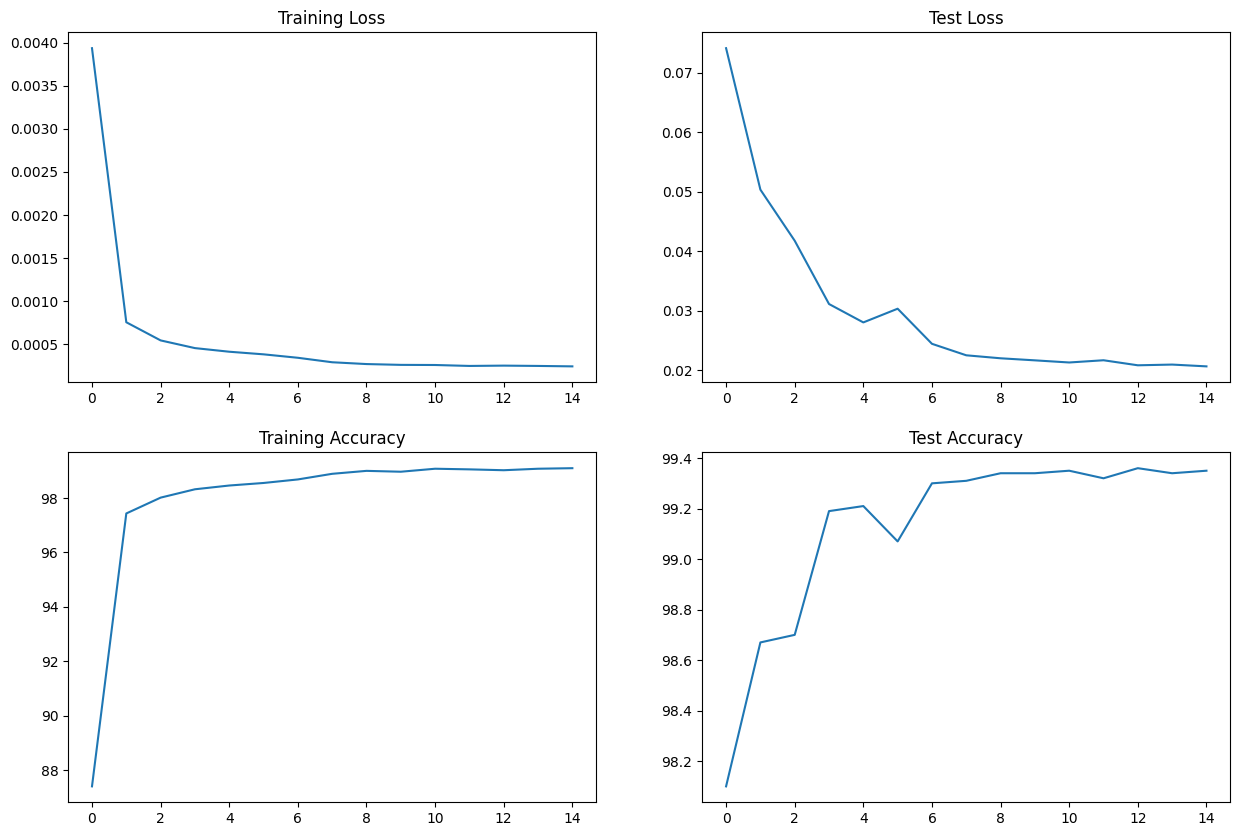

In [114]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")